In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('../NRI_Ratings_Counties.csv')

# Define the risk columns we want to analyze
risk_columns = [
    'AVLN_RISKR', 'CFLD_RISKR', 'CWAV_RISKR', 'DRGT_RISKR', 'ERQK_RISKR',
    'HAIL_RISKR', 'HWAV_RISKR', 'HRCN_RISKR', 'ISTM_RISKR', 'LNDS_RISKR',
    'LTNG_RISKR', 'RFLD_RISKR', 'SWND_RISKR', 'TRND_RISKR', 'TSUN_RISKR',
    'VLCN_RISKR', 'WFIR_RISKR', 'WNTW_RISKR'
]

# Create a mapping for the categorical values to numeric
rating_map = {
    'Very High': 5,
    'Relatively High': 4,
    'Relatively Moderate': 3,
    'Relatively Low': 2,
    'Very Low': 1,
    'No Rating': 0,
    'Not Applicable': 0,
    'Insufficient Data': np.nan
}

# Create a copy of the dataframe with only risk columns
risk_df = df[risk_columns].copy()

# Convert categorical values to numeric
for col in risk_columns:
    risk_df[col] = risk_df[col].map(rating_map)

# Calculate correlation matrix
corr_matrix = risk_df.corr(method='spearman')


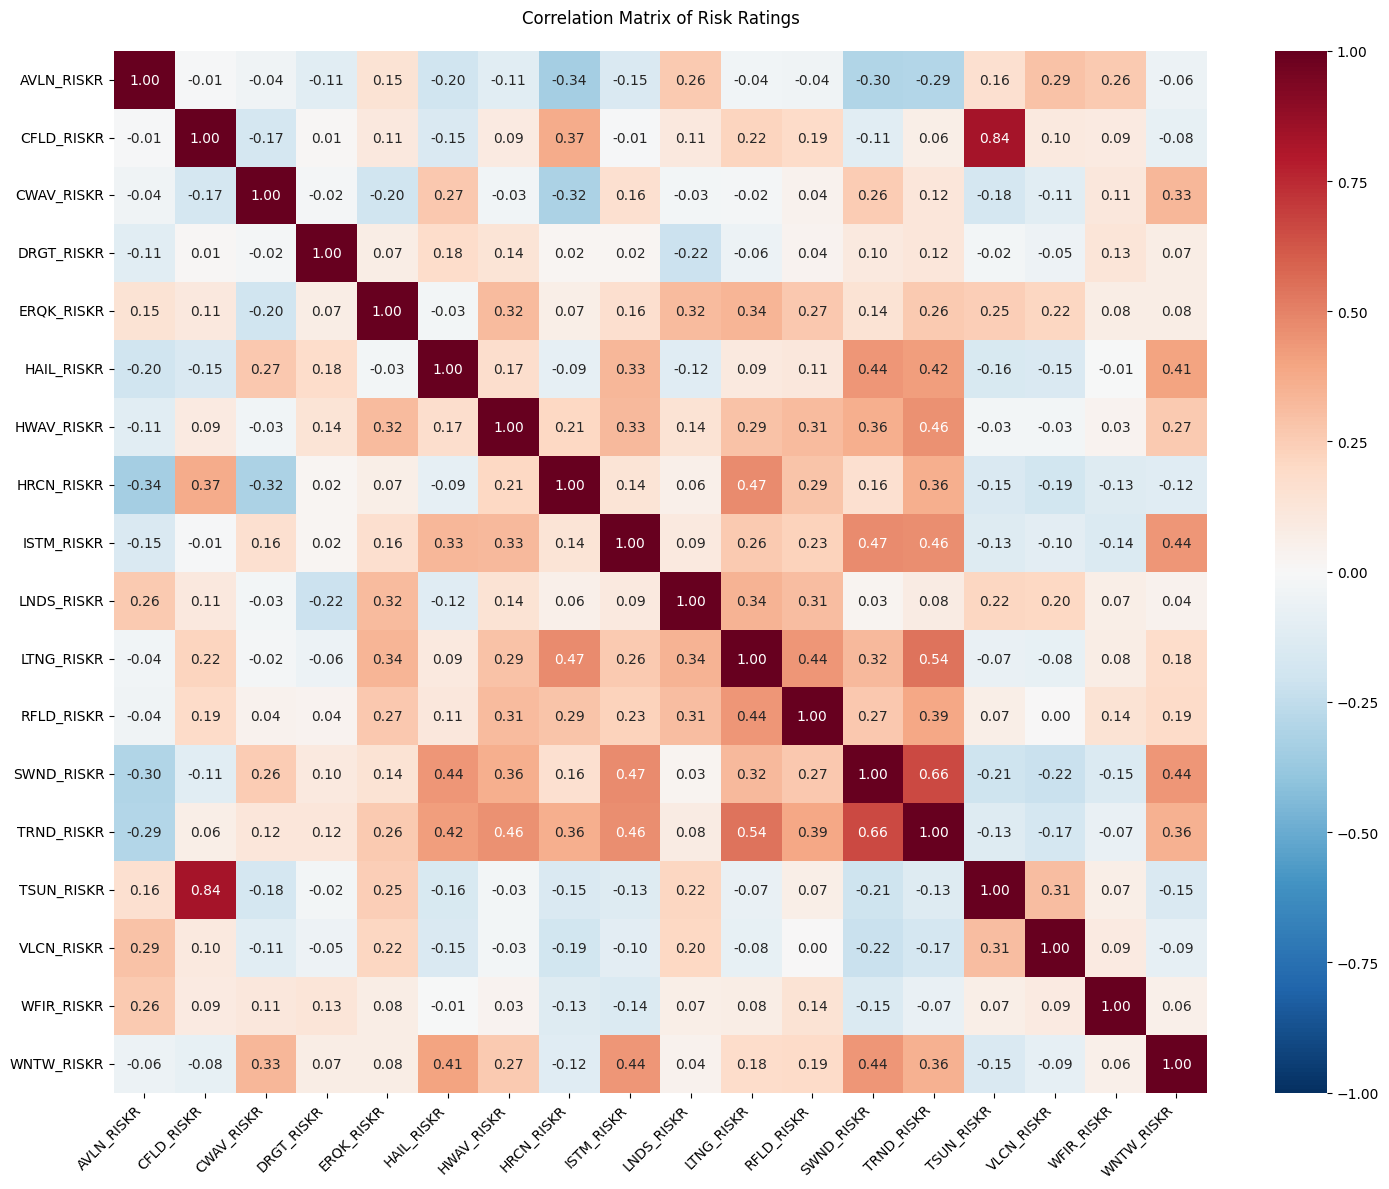

In [2]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap
sns.heatmap(corr_matrix, 
            annot=True,  # Show correlation values
            cmap='RdBu_r',  # Red-Blue diverging colormap
            vmin=-1, vmax=1,  # Set the range of correlations
            center=0,  # Center the colormap at 0
            fmt='.2f')  # Round correlation values to 2 decimal places

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add a title
plt.title('Correlation Matrix of Risk Ratings', pad=20)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()


In [3]:
# Print basic statistics about the data
print("Number of counties analyzed:", len(risk_df))
print("\nMissing values per risk type:")
print(risk_df.isna().sum())

# Calculate the percentage of each rating for each risk type
print("\nDistribution of ratings (percentage):")
for col in risk_columns:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    percentage = (value_counts / len(df) * 100).round(2)
    for rating, pct in percentage.items():
        print(f"{rating}: {pct}%")


Number of counties analyzed: 3231

Missing values per risk type:
AVLN_RISKR      0
CFLD_RISKR     88
CWAV_RISKR     88
DRGT_RISKR     88
ERQK_RISKR     88
HAIL_RISKR     88
HWAV_RISKR     88
HRCN_RISKR     88
ISTM_RISKR      0
LNDS_RISKR    118
LTNG_RISKR    123
RFLD_RISKR     88
SWND_RISKR     88
TRND_RISKR     88
TSUN_RISKR    469
VLCN_RISKR     18
WFIR_RISKR     88
WNTW_RISKR     88
dtype: int64

Distribution of ratings (percentage):

AVLN_RISKR:
Not Applicable: 93.56%
Very Low: 3.06%
Relatively Low: 1.61%
Relatively Moderate: 1.02%
Relatively High: 0.46%
Very High: 0.28%

CFLD_RISKR:
Not Applicable: 81.89%
Very Low: 4.67%
Relatively Low: 4.55%
Relatively Moderate: 3.03%
Insufficient Data: 2.72%
No Rating: 2.29%
Relatively High: 0.65%
Very High: 0.19%

CWAV_RISKR:
No Rating: 26.09%
Relatively Moderate: 25.22%
Relatively Low: 25.16%
Relatively High: 12.47%
Very Low: 4.8%
Very High: 3.53%
Insufficient Data: 2.72%

DRGT_RISKR:
Very Low: 34.35%
Relatively Low: 31.66%
Relatively Moderate

In [7]:
# Create a mask for correlations > x and not self-correlations
mask = (corr_matrix > 0.4) & (corr_matrix != 1.0)

# Get pairs of variables with correlations > 0.25
strong_correlations = []
for i in range(len(risk_columns)):
    for j in range(i + 1, len(risk_columns)):  # Start from i+1 to avoid duplicates
        if mask.iloc[i, j]:
            strong_correlations.append({
                'Risk 1': risk_columns[i],
                'Risk 2': risk_columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

# Convert to DataFrame and sort by correlation strength
strong_corr_df = pd.DataFrame(strong_correlations)
strong_corr_df = strong_corr_df.sort_values('Correlation', ascending=False)

# Display results
print("Strong Positive Correlations (> 0.25):\n")
print(strong_corr_df.to_string(index=False, float_format=lambda x: '{:.3f}'.format(x)))


Strong Positive Correlations (> 0.25):

    Risk 1     Risk 2  Correlation
CFLD_RISKR TSUN_RISKR        0.835
SWND_RISKR TRND_RISKR        0.663
LTNG_RISKR TRND_RISKR        0.544
ISTM_RISKR SWND_RISKR        0.475
HRCN_RISKR LTNG_RISKR        0.470
ISTM_RISKR TRND_RISKR        0.462
HWAV_RISKR TRND_RISKR        0.456
SWND_RISKR WNTW_RISKR        0.443
ISTM_RISKR WNTW_RISKR        0.440
LTNG_RISKR RFLD_RISKR        0.439
HAIL_RISKR SWND_RISKR        0.438
HAIL_RISKR TRND_RISKR        0.419
HAIL_RISKR WNTW_RISKR        0.406


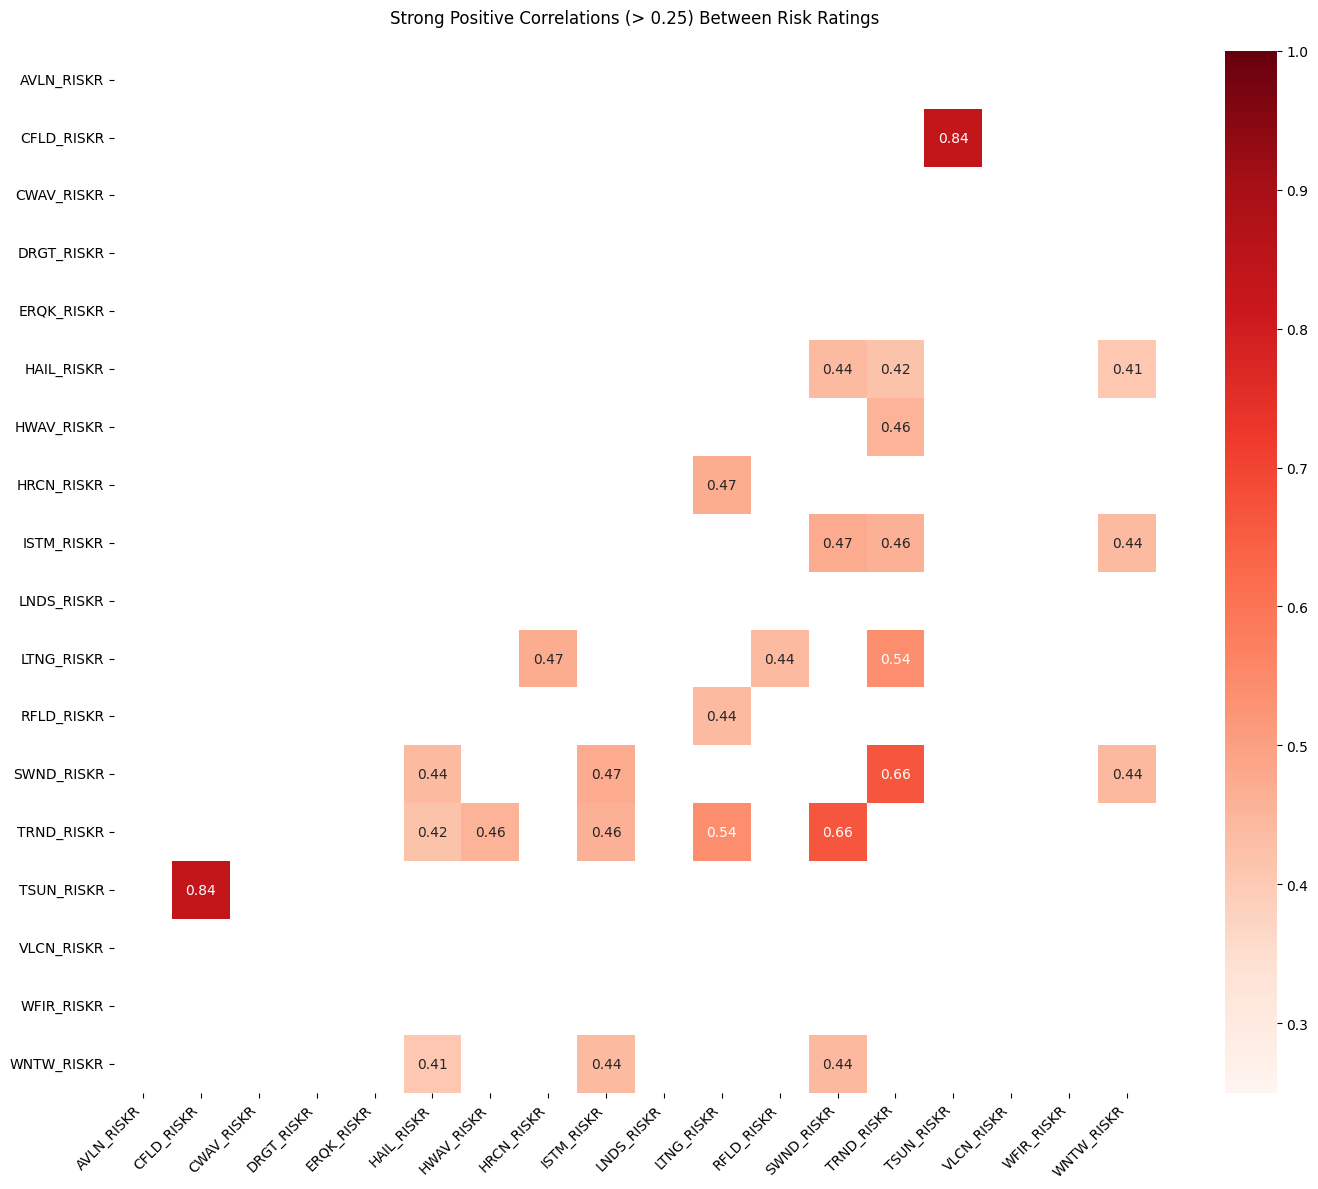

In [8]:
# Create a heatmap showing only strong correlations
plt.figure(figsize=(15, 12))

# Create a masked correlation matrix
masked_corr = corr_matrix.copy()
masked_corr[~mask] = np.nan

# Create heatmap with only strong correlations
sns.heatmap(masked_corr,
            annot=True,
            cmap='Reds',  # Use red colormap for positive correlations
            vmin=0.25, vmax=1,
            fmt='.2f',
            square=True)

plt.title('Strong Positive Correlations (> 0.25) Between Risk Ratings', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
